## Commets from reviewer

<span style="color:green"> Hi! Congratulations on your first project :)You did a great job! Very nice and deep project. You definitely know your data and methods. Seems like you already have experience in DS. I truly enjoyed your project. I just left a tiny comment about categorization) Please find my comment in the Markdown cell with green text. Good luck with the next project! :) </span> 

## Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a **credit scoring** of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

### Step 1. Open the data file and have a look at the general information. 

In [1]:
# import pandas library and dataset

import pandas as pd
data = pd.read_csv('/datasets/credit_scoring_eng.csv')

# have a look at basic information about the data

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


### Conclusion

The imported dataset has 21525 entries and 12 columns. By a first glance, there are missing values in the days_employed and total_income columns. The two columns have the same number of total missing values.

### Step 2. Data preprocessing

### Processing missing values

In [2]:
# Identify total number of missing values in the selected fields
# Note that df.isna().sum() and df.isnull().sum() will yield the same results here

print('The total number of missing values in the selected fields are', data['days_employed'].isna().sum())

# Replace these missing fields with the median value.

data['total_income'].fillna(value = data['total_income'].median(), inplace=True)
data['days_employed'].fillna(value = data['days_employed'].median(), inplace=True)

# Make sure that all fields from these two fields are populated

print('After filling in missing fields with the corrosponding median value, there are total of', data['total_income'].isna().sum(), 'missing values')

The total number of missing values in the selected fields are 2174
After filling in missing fields with the corrosponding median value, there are total of 0 missing values


### Conclusion

Question: 
- Which missing values you identified
- Possible reasons these missing values were present
- Which method you used to fill in missing values

Answer: 
- The columns that have missing values are days_employed, and total_income. There are a total of 2174 missing values present in each column.
- Since the two fields have identify total number of missing values, it is highly suspected that these two fields are somewhat related. For example, whenever there is a missing value in one column the corrosponding field in the other column also has a missing value.
- This type observation occurs potentially because a person's income and status of employment is highly correlated. If unemployment is reflected in days_employed (as missing values), then the corrosponding total income for that person also could be reflected as missing values. 
- I used the fillna() method to fill in missing values from days_employed column and total_income column with median values from the their respective columns.

<span style="color:green">Nice approach)Take a closer look at days_employed? Do they look realistic to you? Also, what about dob_years? </span>

### Data type replacement

In [3]:
# Replace the real-number data type with the integer type

data['days_employed'] = data['days_employed'].astype('int')
data['total_income'] = data['total_income'].astype('int')

# Check the data types again

print(data.dtypes)

children             int64
days_employed        int64
dob_years            int64
education           object
education_id         int64
family_status       object
family_status_id     int64
gender              object
income_type         object
debt                 int64
total_income         int64
purpose             object
dtype: object


### Conclusion

Questions:
- Which method you used to change the data type and why

Answers:
- There are only two fields are float data type, they are days_employed and total_income. All other fields are either object or integer.
- I used astype() method to change the data type because the to_numeric() method would only convert data to float64, and our desired data type is integer here.

<span style="color:green">I really like how you explain your methods here :)

### Processing duplicates

In [4]:
# First look at the duplicated data

print(data[data.duplicated()].head(10), '\n')

# After inspecting, find which columns do the duplicated values come from

print('The days_employed column only has a unique value of', data[data.duplicated()]['days_employed'].unique())
print('The total_income column only has a unique value of', data[data.duplicated()]['total_income'].unique(), '\n')

# Find out how many duplicates are there in our data

print('The total number of duplicates is', data.duplicated().sum())

# Drop the duplicates 

data.drop_duplicates(inplace=True)

# Check again

print('The total number of duplicates after deleting is', data.duplicated().sum())

       children  days_employed  dob_years            education  education_id  \
2849          0          -1203         41  secondary education             1   
4182          1          -1203         34       MASTERS DEGREE             0   
4851          0          -1203         60  secondary education             1   
5557          0          -1203         58  secondary education             1   
7808          0          -1203         57  secondary education             1   
8583          0          -1203         58       masters degree             0   
9238          2          -1203         34  secondary education             1   
9528          0          -1203         66  secondary education             1   
9627          0          -1203         56  secondary education             1   
10462         0          -1203         62  secondary education             1   

           family_status  family_status_id gender income_type  debt  \
2849             married                 0      

### Conclusion

Questions:
- Which method you used to find and delete duplicate data and why
- Possible reasons why duplicate data was present

Answers:
- After inspecting the duplicated data, we found that the days_employed and total_income columns only have one unique value, these two columns are the places where all duplicated data came from.
- There are a total of 54 entries that are duplicates in the dataframe. I used the duplicated() method combined with the sum() to calcuate a the total number of duplicated entries.
- It's observed that, from these duplicated data, total_income and days_employed both have only 1 values, this is the reason that there are 54 duplicated records.

### Lemmatization

In [5]:
# Find lemmas for values in the column listing reasons for taking out a loan

import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemma = WordNetLemmatizer()

data['purpose_new'] = data['purpose'].apply(nltk.word_tokenize)
data['lemmas'] = data['purpose_new'].apply(lambda x: ' '.join([wordnet_lemma.lemmatize(w, pos='n') for w in x]))

# Inspect the results

print('Total number of unique values in the purpose column before lemmatization is', len(data['purpose'].value_counts()))
print('Total number of unique values in the newly created lemmas column is', len(data['lemmas'].value_counts()))

Total number of unique values in the purpose column before lemmatization is 38
Total number of unique values in the newly created lemmas column is 37


### Conclusion

Questions:
- How you used lemmatization on the reasons for getting a loan
- Which dictionaries you've selected for this data set and why

Answers:
- I first tokenized each value from the purpose column, then used WordNetLemmatizer() method because this method further reduces the inflected words properly ensuring that the root word belongs to the language.
- By using the WordNetLemmatizer() method, tokenized messages will be automatically reduced to the lemmas that are valid in the same language.
- I noticed that the total number of unique values in the original purpose column and the new lemmas column is different by 1. Although I would expect to see a much large difference since many purpose text (after tokenized) share the same root. My understanding of the use of lemmatization is that it reduces multiple different text to the same or similar lemmas, this will greatly reduce and simplify the both the content and number of unique text so that we could quickly extract the important key words by merely inspecting the lemmatized results. 

<span style="color:green">Lemmatization step is correct :)

### Categorizing Data

In [6]:
# My intent here is to categorize the 'lemmas' column. In order to do that, I first need to inspect the lemmas of each purpose

print(data['lemmas'].value_counts(), '\n')

# There are several key words we can extract from the lemmas

key_words = ['car', 'wedding', 'real estate', 'property', 'house', 'housing', 'education', 'educated']

# Create a function to encode the 'lemmas' with integers

def categorize_lemmas(row):
    lemma = row['lemmas']
    
    if lemma.find(key_words[0]) != -1:
        return 1
    if lemma.find(key_words[1]) != -1:
        return 2
    if lemma.find(key_words[2]) != -1:
        return 3
    if lemma.find(key_words[3]) != -1:
        return 3
    if lemma.find(key_words[4]) != -1:
        return 3
    if lemma.find(key_words[5]) != -1:
        return 3
    if lemma.find(key_words[6]) != -1:
        return 4
    if lemma.find(key_words[7]) != -1:
        return 4
    else:
        return 5
            
data['lemmas_encoded'] = data.apply(categorize_lemmas, axis=1)

# See if the total number of encoded values match with the total number of lemmas we originaly have

print('The total number of lemmas is', data['lemmas'].value_counts().sum())
print('The number of encoded rows is', data['lemmas_encoded'].value_counts().sum())

car                                             972
wedding ceremony                                793
having a wedding                                773
to have a wedding                               769
real estate transaction                         675
buy commercial real estate                      662
buying property for renting out                 652
housing transaction                             652
transaction with the residential real estate    650
housing                                         646
purchase of the house                           646
purchase of the house for my family             638
construction of own property                    635
property                                        633
transaction with my real estate                 627
building a real estate                          625
buy real estate                                 621
purchase of my own house                        620
building a property                             619
property ren

### Conclusion

I selected the lemmatized purpose column to categorize because this will extract the value out of the text data.

<span style="color:green">Here for categorization of purposes, you may just check whether a purpose, for example 'car', is in your lemmatized parameter :) Here are some ways how you can check whether one string contains another.<br>
https://www.educative.io/edpresso/how-to-check-if-python-string-contains-another-string
Try to write a function that will look for categories in your lemmas_encoded. It may look smth like this: <br>
    **if "car" in lemmas_encoded:**<br>
        **$\;\;\;\;\;\;$return "car"**<br>
  I believe it will help you a lot in the next projects)


### Step 3. Answer these questions

- Is there a relation between having kids and repaying a loan on time?

Value counts within the children column:
 0     14107
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64 

Value counts of the new column after categorize the children column:
0    14154
1     7317
Name: children_new, dtype: int64 



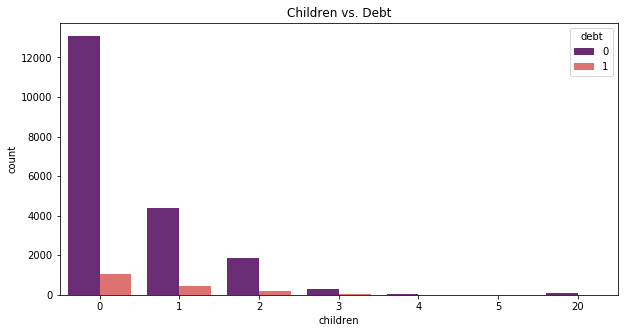

Contingency table:
debt              0     1  perc_by_row
children_new                          
0             13090  1064     0.075173
1              6640   677     0.092524


In [7]:
# 1
# Inspect the children columns

print('Value counts within the children column:')
print(data['children'].value_counts(), '\n')

# There is -1 presents in the children column and since there are only 47 of them, which contributes a small number of
# the total population, I wll convert the -1's to 0 for the purpose of this study.

data.loc[data['children'] == -1, 'children'] = 0

# 2
# We need to categorize the children column in a way that 1 indicates if a customer has children at all and 0 otherwise. 
# This step is necessary for creating the contingency tables

def categorize_children(children):
    if children != 0:
        return 1
    else:
        return 0

data['children_new'] = data['children'].apply(categorize_children)

print('Value counts of the new column after categorize the children column:')
print(data['children_new'].value_counts(), '\n')

# 3
# Visualize using bar chart based on the original children and debt columns

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(x = 'children', hue = 'debt', data = data, palette = 'magma')
plt.title('Children vs. Debt')
plt.show()

# 4
# Contengency table with row percentage

def row_perc(row):
    temp1 = row[1]
    temp2 = row.sum()
    return temp1/temp2

contengency_table_children = pd.crosstab(data['children_new'], data['debt'], margins=False)
contengency_table_children['perc_by_row'] = contengency_table_children['perc_by_row'] = contengency_table_children.apply(row_perc, axis=1)

print('Contingency table:')
print(contengency_table_children)

<span style="color:green">You did a nice job with graphs! 

### Conclusion

We will use bar chart and contingency tables to visualize the result. Note that since the debt column is categorical and the children column is discrete, it wouldn't be wise to calculate the correlation directly from the two columns. 

Summary:
- First, inspect the values from the children column and see if there is anything that are uncommon. We found that there are -1's present in the column which we need to convert them to 0's
- Second, categorize the children column for later analysis (contingency table)
- Third, visualize the relation between the original children and debt columns by using bar chart
- Fourth, creating a contingency table using the newly categorized children column then calculate row percentages

Results:
- From inspecting the bar chart, one may quickly conclude that the number of defaulted people in group 0 (families without children) is more than the number of defaulted people in other groups (families with 1 child, with 2 children, and so forth). Therefore, there is a mild negative association between number children and repaying loan on time. However, note that the base population in the group 0 is also a lot larger than all other groups.
- Large population is easier to detect effect, does not mean such effect is significant nor having enough effect size and power.
- Continue on by inspecting the contingency table, we found that the number of defaulted pople who don't have children is only 2% more than the number of defaulted people who have children, thus we conclude that there is no direct correlation between repaying loan on time and having children.
- A further study on significance testing is needed to obtain an accurate answer.

- Is there a relation between marital status and repaying a loan on time?

Value counts within the family_status column:
married              12344
civil partnership     4163
unmarried             2810
divorced              1195
widow / widower        959
Name: family_status, dtype: int64 

Value counts within the family_status_id column:
0    12344
1     4163
4     2810
3     1195
2      959
Name: family_status_id, dtype: int64


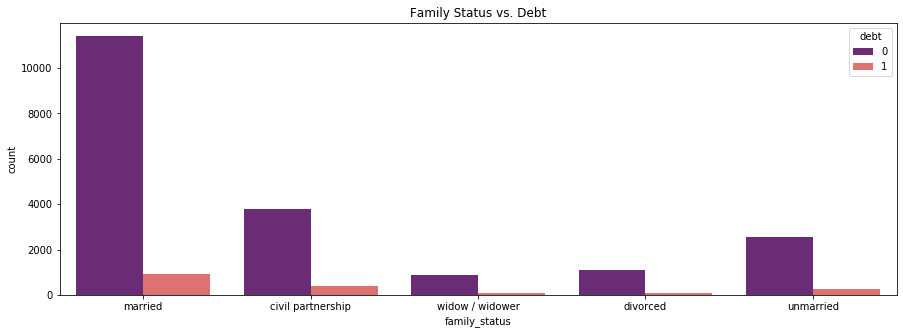

Contingency table:
debt                   0    1  perc_by_row
family_status                             
civil partnership   3775  388     0.093202
divorced            1110   85     0.071130
married            11413  931     0.075421
unmarried           2536  274     0.097509
widow / widower      896   63     0.065693


In [8]:
# 1
# Inspect the values from family_status column, look for values that are uncommon

print('Value counts within the family_status column:')
print(data['family_status'].value_counts(), '\n')
print('Value counts within the family_status_id column:')
print(data['family_status_id'].value_counts())

# 2
# Bar chart

plt.figure(figsize=(15,5))
sns.countplot(x = 'family_status', hue = 'debt', data = data, palette = 'magma')
plt.title('Family Status vs. Debt')
plt.show()

# 3
# Contingency table

contengency_table_family = pd.crosstab(data['family_status'], data['debt'], margins=False)
contengency_table_family['perc_by_row'] = contengency_table_family.apply(row_perc, axis=1)

print('Contingency table:')
print(contengency_table_family)

### Conclusion

Summary:
- First, inspect the values in the family_status and family_status_id columns and see if there is anything that are uncommon.
- Second, visualize the relation between family_status and debt using bar chart
- Third, create a contingency table

Results:
- From inspecting the contingency table, we found that the proportions of defaulted pople, acrossing all family_status categories, all have similar percentages. Thus I conclude that there is no direct relation between family status and repaying loan on time.
- Note that the row percentage of widow/widower is 6.5%, I need to further investigate on significance to obtain an accurate answer.

- Is there a relation between income level and repaying a loan on time?

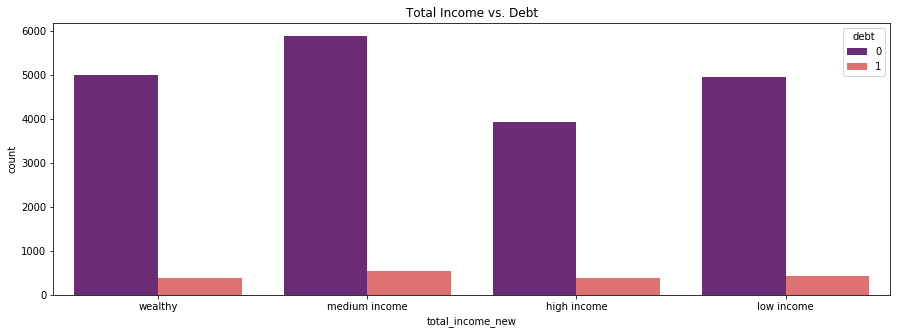

Contingency table:
debt                 0    1  perc_by_row
total_income_new                        
high income       3923  384     0.089157
low income        4941  427     0.079545
medium income     5881  547     0.085096
wealthy           4985  383     0.071349


In [9]:
# 1
# Inspect the values from total_income column, then categorize it and create a new object column

low = data['total_income'].describe()['25%']
medium = data['total_income'].describe()['50%']
high = data['total_income'].describe()['75%']

def categorize_income(income):
    if income <= low:
        return 'low income'
    if income <= medium:
        return 'medium income'
    if income <= high:
        return 'high income'
    else:
        return 'wealthy'

data['total_income_new'] = data['total_income'].apply(categorize_income)

# 2
# Bar Chart

plt.figure(figsize=(15,5))
sns.countplot(x = 'total_income_new', hue = 'debt', data = data, palette = 'magma')
plt.title('Total Income vs. Debt')
plt.show()

# 3
# Contingency table

contengency_table_income = pd.crosstab(data['total_income_new'], data['debt'], margins=False)
contengency_table_income['perc_by_row'] = contengency_table_income.apply(row_perc, axis=1)

print('Contingency table:')
print(contengency_table_income)

### Conclusion

Summary:
- First, categorize total income
- Second, visualize the relation between total income and debt using bar chart
- Third, create a contingency table

Results:
- From inspecting the contingency table and the bar chart, I found that the proportions of defaulted pople, acrossing all income categories, all have similar row percentages. Thus I conclude that there is no direct relation between total income and repaying loan on time.

- How do different loan purposes affect on-time repayment of the loan?

Value counts from the encoded lemmas field:
3    10814
1     4308
4     3518
2     2335
5      496
Name: lemmas_encoded, dtype: int64 

Value counts from the new key words field:
property     10814
car           4308
education     3518
wedding       2335
unknown        496
Name: key_words, dtype: int64


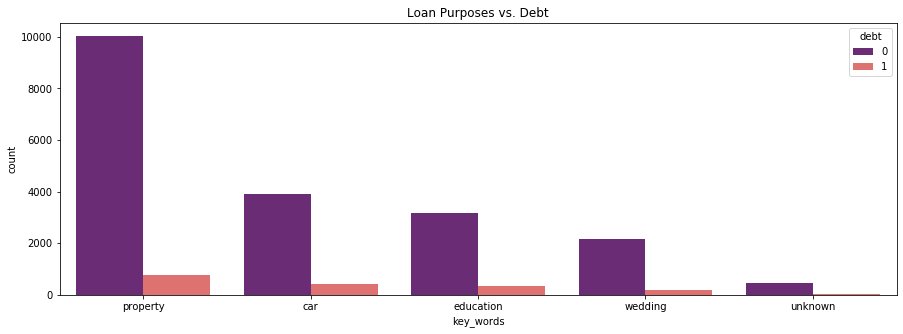

Contingency table:
debt           0    1  perc_by_row
key_words                         
car         3905  403     0.093547
education   3191  327     0.092951
property   10032  782     0.072314
unknown      453   43     0.086694
wedding     2149  186     0.079657


In [10]:
# 1
# Map the encoded lemmas to related key words

key_words_reduced = ['car', 'wedding', 'property', 'education', 'unknown']
key_words_reduced = {i:k for i, k in enumerate(key_words_reduced, 1)}
data['key_words'] = data['lemmas_encoded'].map(key_words_reduced)

print('Value counts from the encoded lemmas field:')
print(data['lemmas_encoded'].value_counts(), '\n')
print('Value counts from the new key words field:')
print(data['key_words'].value_counts())

# 2
# Bar chart

plt.figure(figsize=(15,5))
sns.countplot(x = 'key_words', hue = 'debt', data = data, palette = 'magma')
plt.title('Loan Purposes vs. Debt')
plt.show()

# 3
# Contingency table

contengency_table_purpose = pd.crosstab(data['key_words'], data['debt'], margins=False)
contengency_table_purpose['perc_by_row'] = contengency_table_purpose.apply(row_perc, axis=1)

print('Contingency table:')
print(contengency_table_purpose)

### Conclusion

Summary:
- First, create a reduced key words list use for mapping the encoded lemmas
- Second, visualize the relation between loan purpose and debt using bar chart
- Third, create a contingency table

Results:
- From inspecting the contingency table and the bar chart, I found that the proportions of defaulted pople, acrossing all purpose categories, have similar row percentages. Thus I conclude that there is no direct relation between total income and repaying loan on time.

<span style="color:green">This step is great! Good methods and very deep conclusions)

### Step 4. General conclusion

Throughout the process of completing task 2, our purpose has been determining if there is a direct association between repaying loan on time and a series of other features from our dataset (purpose, income, family status, having children). In short, there is no direct association betwen repaying loan on time and previously mentioned features. 

Such conclusion is made based on series observations from various bar charts and contingency tables. For example, one common observation is that, by inspecting the contingency tables, the proportion of peope who did not repay loan on time is not significantly higher than the proportion of people who did repay loan on time, regardless of whether such person has children, or married, or he/she is a high income, etc. 

In addition, bar charts and contingency tables are being used due to the fact that they both are very straightforward and they both accept category variables as input. Please recall that there are several features that are originally numerical features. Also recall that the debt feature (repaying on time) is a categorical with two levels. Thus, it is clear to me that using the debt feature as a grouping and apply it to the categorized numerical features (children_new, key_words, etc.) on the x-axis in a bar chart would produce straigthforward results that are easy to make conclusion on. 

A further study on proportion's significance is recommended due to fact that the proportion of people who repay loan on time is a lot larger than the proportion of people who did not repay on time. This would make more difficult to derive a conclusion based on merely inspecting the bar charts. Furthermore, chi-squre statistics would provide valuable justification on whether the conclude made from the contingency table is valid or not.  

<span style="color:green">Wow! Very detailed) Good insight for a future studies)

### Project Readiness Checklist

Put 'x' in the completed points. Then press Shift + Enter.

- [x]  file open;
- [x]  file examined;
- [x]  missing values defined;
- [x]  missing values are filled;
- [x]  an explanation of which missing value types were detected;
- [x]  explanation for the possible causes of missing values;
- [x]  an explanation of how the blanks are filled;
- [x]  replaced the real data type with an integer;
- [x]  an explanation of which method is used to change the data type and why;
- [x]  duplicates deleted;
- [x]  an explanation of which method is used to find and remove duplicates;
- [x]  description of the possible reasons for the appearance of duplicates in the data;
- [x]  highlighted lemmas in the values of the loan purpose column;
- [x]  the lemmatization process is described;
- [x]  data is categorized;
- [x]  an explanation of the principle of data categorization;
- [x]  an answer to the question "Is there a relation between having kids and repaying a loan on time?";
- [x]  an answer to the question " Is there a relation between marital status and repaying a loan on time?";
- [x]   an answer to the question " Is there a relation between income level and repaying a loan on time?";
- [x]  an answer to the question " How do different loan purposes affect on-time repayment of the loan?"
- [x]  conclusions are present on each stage;
- [x]  a general conclusion is made.